In [112]:
import numpy as np
from skimage import io
from skimage import color
from skimage import transform
from scipy.ndimage.filters import gaussian_laplace, generic_filter, gaussian_filter
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [113]:
def read_image_gs(IMG_DIR):
    # YOUR CODE HERE
    img = io.imread(IMG_DIR)
    img = color.rgb2gray(img)
    img /= 255
    return img

In [147]:
def read_image_gs1(IMG_DIR):
    # YOUR CODE HERE
    img = io.imread(IMG_DIR)
    img = color.rgb2gray(img)
    return img

# Hybrid Images

In [114]:
IMG1_DIR = './part1/c1.jpg'
IMG2_DIR = './part1/c2.jpg'


float64


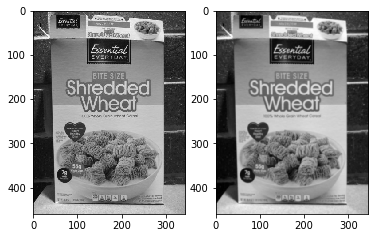

[[ 0.02257645  0.0104947  -0.00555813 ...  0.17917694  0.17135777
   0.13664269]
 [ 0.07355614  0.16930562  0.0812796  ...  0.13068025  0.10382073
   0.06854116]
 [ 0.03096141  0.1149679   0.11067672 ...  0.0350639  -0.01980814
  -0.04553829]
 ...
 [-0.04632853 -0.0250751   0.02611578 ... -0.01512243  0.03534041
   0.04320737]
 [-0.06585204 -0.02499047  0.02033002 ... -0.00379902  0.03546373
   0.02372239]
 [-0.0775742  -0.00336778  0.02429457 ...  0.01195014  0.01983991
  -0.00309302]]


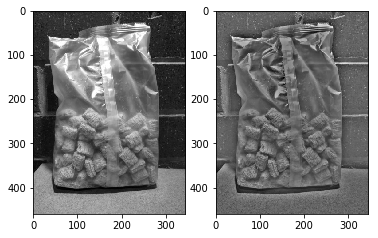

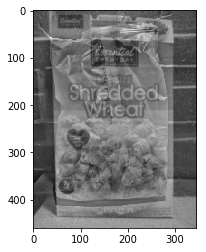

In [159]:
img1 = read_image_gs1(IMG1_DIR)
print(img1.dtype)
fig = plt.figure()
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
# plt.imshow(img2, cmap = 'gray')

plt.subplot(122)
img1 = gaussian_filter(img1, sigma = 1)
plt.imshow(img1, cmap = 'gray')
plt.show()

img2 = read_image_gs1(IMG2_DIR)
fig = plt.figure()
plt.subplot(121)
plt.imshow(img2, cmap = 'gray')
img2 = (img2 - gaussian_filter(img2, sigma = 10))
print(img2)
plt.subplot(122)
plt.imshow(img2, cmap = 'gray')
plt.show()

res_img = img1 / 2 + img2 / 2
fig = plt.figure()
plt.imshow(res_img, cmap = 'gray')

# Blob Detector

In [60]:
INIT_SIGMA = 2
LEVELS = 12
K = 1.3

In [90]:
def get_scale_space(img, init_sigma, levels, k, method):
    sigma = init_sigma
    h, w = img.shape[0], img.shape[1]
    
    scale_space = np.empty((h, w, levels))
    
    if method == 'filter':
        for level in range(levels):
            
            scale_space[:, :, level] = ((sigma ** 2) * gaussian_laplace(img, sigma = sigma)) ** 2
            sigma *= k
    
    if method == 'down_sample':
        sampled_img = img
        for level in range(levels):
            LoG = gaussian_laplace(sampled_img, sigma = sigma) ** 2 
            scale_space[:, :, level] = transform.resize(LoG, (h, w), order = 2)
            
            sampled_img = transform.rescale(sampled_img, 1.0 / K, order = 2)
            
            
    print(scale_space)
    return scale_space

In [63]:
def non_max_sup(scale_space):
    return generic_filter(scale_space, sup_fnc, size = (3, 3, 3))

In [64]:
def sup_fnc(buffer):
    buffer_length = buffer.shape[0]
    center = int(buffer_length / 2)
    return buffer[center] if buffer[center] == buffer.max() else 0

In [79]:
def get_blobs(scale_space, threshold):
    
    cx, cy, ns = np.where(scale_space > threshold)
    rad = np.empty((cx.shape[0]))
    for i in range(len(ns)):
        sigma = INIT_SIGMA * K ** ns[i]
        rad[i] = np.sqrt(2) * sigma
      
    return cx, cy, rad

In [ ]:
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

[[[9.15081864e-09 1.47567764e-08 1.52593844e-08 ... 4.00219570e-08
   2.68970017e-07 6.83853405e-07]
  [6.09123395e-09 9.41028115e-09 1.02970218e-08 ... 4.03143862e-08
   2.69030135e-07 6.83025014e-07]
  [2.16284969e-09 3.07666516e-09 3.94074308e-09 ... 4.08986989e-08
   2.69144451e-07 6.81369753e-07]
  ...
  [5.30521460e-10 3.09643782e-09 1.12872150e-08 ... 1.02804321e-08
   2.15482232e-08 3.71710133e-08]
  [1.65882671e-11 8.40768116e-10 7.98261113e-09 ... 1.05567260e-08
   2.18818628e-08 3.75107570e-08]
  [4.30730453e-10 1.32952947e-10 6.15587393e-09 ... 1.06963951e-08
   2.20499334e-08 3.76815327e-08]]

 [[9.59784915e-09 1.42030931e-08 1.49605522e-08 ... 4.02926440e-08
   2.69253852e-07 6.83754398e-07]
  [5.54055094e-09 8.76437258e-09 1.00313955e-08 ... 4.05855011e-08
   2.69313642e-07 6.82926128e-07]
  [1.25069003e-09 2.56053214e-09 3.74716276e-09 ... 4.11706606e-08
   2.69427306e-07 6.81271110e-07]
  ...
  [1.59724453e-09 4.14383488e-09 1.12505557e-08 ... 1.04128090e-08
   2.16661

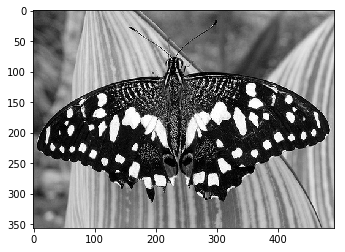

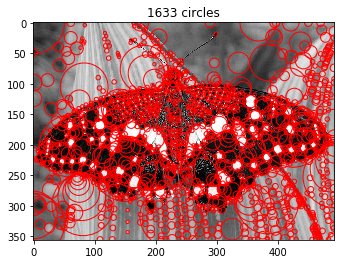

In [136]:
IMG_DIR = './butterfly.jpg'
img = read_image_gs(IMG_DIR)
plt.imshow(img, cmap='gray')

scale_space = get_scale_space(img, INIT_SIGMA, LEVELS, K, 'filter')
scale_space = non_max_sup(scale_space)
cx, cy, rad = get_blobs(scale_space, 0.0000001)
# show_all_circles(img, cx, cy, rad, color='r')
show_all_circles(img, cy, cx, rad, color='r')

/Users/zhengliangzhu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/zhengliangzhu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/Users/zhengliangzhu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:814: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  warn("

[[[5.71926165e-10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [3.80702122e-10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.35178105e-10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [3.31575913e-11 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.03676669e-12 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.69206533e-11 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [3.46284434e-10 5.74769291e-10 7.45772932e-10 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [7.81681268e-11 1.59910817e-10 2.49067304e-10 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [9.98277830e-11 2.82519747e-10 6.73283919e-10 ... 0.00000000e+00
   0.00000

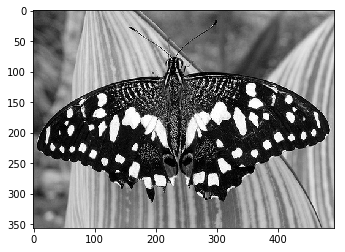

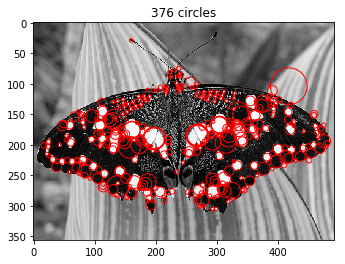

In [135]:
IMG_DIR = './butterfly.jpg'
img = read_image_gs(IMG_DIR)
plt.imshow(img, cmap='gray')

scale_space = get_scale_space(img, INIT_SIGMA, LEVELS, K, 'down_sample')
scale_space = non_max_sup(scale_space)
cx, cy, rad = get_blobs(scale_space, 0.00000005)
# show_all_circles(img, cx, cy, rad, color='r')
show_all_circles(img, cy, cx, rad, color='r')

In [38]:
# main
a = np.arange(125).reshape(5, 5, 5)
a[2, 2, 0] = 1000
a[2, 2, 1] = 1000
a[2, 2, 2] = 1000
a[2, 2, 3] = 1000
a[2, 2, 4] = 1000
print(a)

cx, cy, rad = np.where(a > 150)

print(cx)
print(cy)
print(ns)

[[[   0    1    2    3    4]
  [   5    6    7    8    9]
  [  10   11   12   13   14]
  [  15   16   17   18   19]
  [  20   21   22   23   24]]

 [[  25   26   27   28   29]
  [  30   31   32   33   34]
  [  35   36   37   38   39]
  [  40   41   42   43   44]
  [  45   46   47   48   49]]

 [[  50   51   52   53   54]
  [  55   56   57   58   59]
  [1000 1000 1000 1000 1000]
  [  65   66   67   68   69]
  [  70   71   72   73   74]]

 [[  75   76   77   78   79]
  [  80   81   82   83   84]
  [  85   86   87   88   89]
  [  90   91   92   93   94]
  [  95   96   97   98   99]]

 [[ 100  101  102  103  104]
  [ 105  106  107  108  109]
  [ 110  111  112  113  114]
  [ 115  116  117  118  119]
  [ 120  121  122  123  124]]]
[2 2 2 2 2]
[2 2 2 2 2]
[0 1 2 3 4]


In [35]:
def test_fnc(buffer):
    print(buffer.shape[0])
    idx = int(buffer.shape[0] / 2)
    return buffer[idx] if buffer[idx] == buffer.max() else 0
    